<a href="https://colab.research.google.com/github/wallik2/ML_algorithm_FromScratch/blob/main/%5BScratch%5D_7_HiddenMarkovChain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hidden Markov Chain from Scratch 🙈

![](https://i.imgur.com/BdtjKzY.png)



---



<fieldset>

![](https://i.stack.imgur.com/mBtTX.png)

Hidden markov chain is very similar with Naive bayes, the only difference is it concerns the sequence of the state to state, while NB assume they are independent

<fieldset>

Let's try solving the POS tagging using Hidden Markov chain (HMM)



---



# PROBLEM : POS tagging

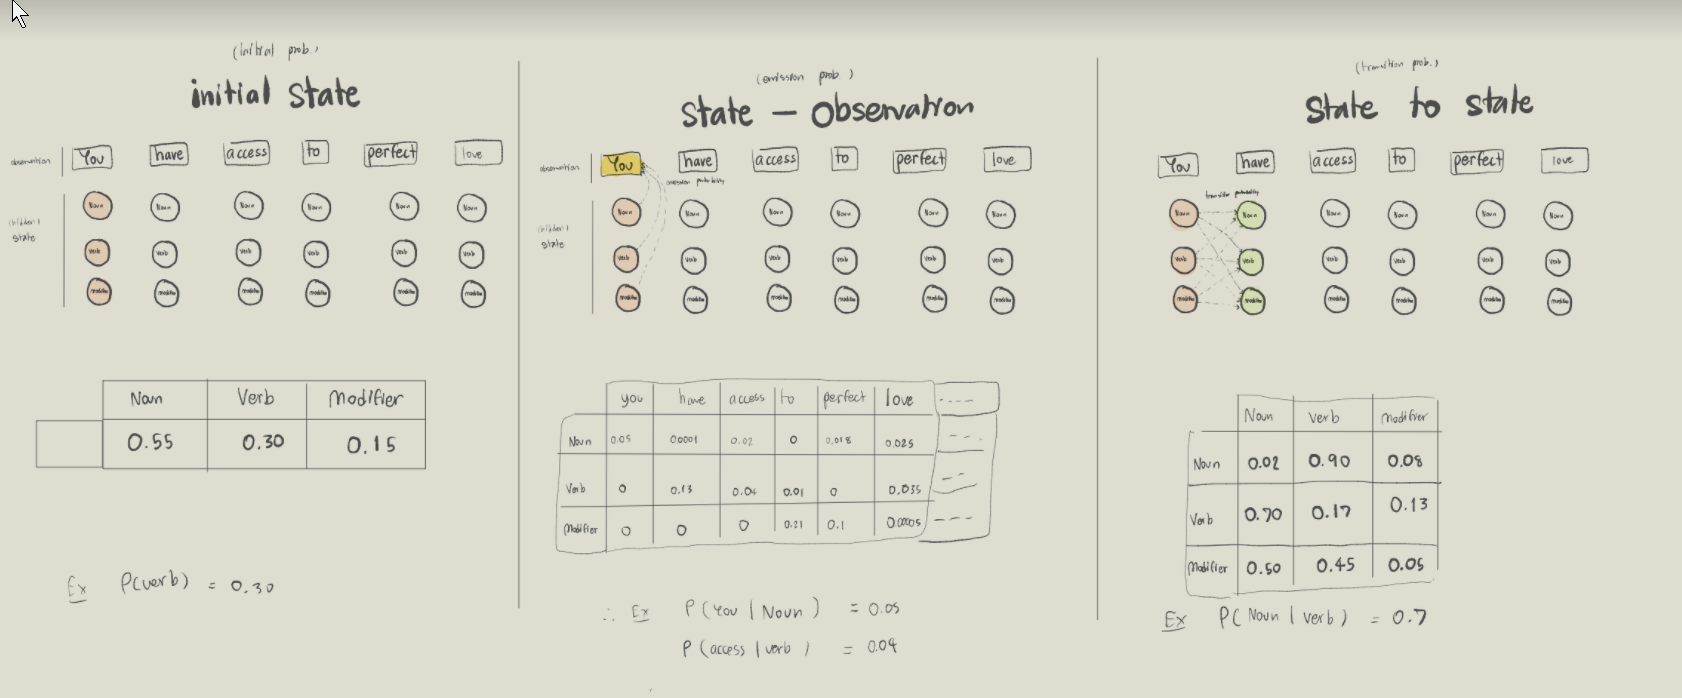

In state-observation, there are actually more than 6 observations, since the english vocabulary have more than a million word, so I left the rest of the observation as ....


But not that, the sum at each row must be 1

# Data





<fieldset>

**Dictionary of observation**

0 : You <br>
1 : have  <br>
2 : access <br>
3 : to <br>
4 : perfect <br>
5 : love <br>



<fieldset>

**Dictionary of (hidden) state**

0 : noun (N) <br>
1 : verb (V) <br>
2 : modifier (M) <br>



---



# Probability matrix for 'You have access to perfect love'

see how this matrix come from in the above **Problem** section

In [10]:
#state to state
transition = [[0.02, 0.90,0.08],
              [0.70, 0.17,0.13],
              [0.50,0.45,0.05]]

  
#state to observation 
emission = [[0.05,0.0001,0.02,0,0.018,0.025],
            [0,0.13,0.04,0.01,0,0.035],
            [0,0,0,0.21,0.1,0.00005],]


#prior probability of the states
initial = [0.55, 0.30,0.15]


# Find the most likely state_seq that generate this obs_seq
# This represent the word
obs_seq = [0,1,2,3,4,5]


print("Setup completed")

Setup completed




---



# HMM Algorithm

In [11]:

best_LL_table = []

best_state_table = []

first_obs = obs_seq[0]

best_LL_first = []
best_state_first = []

print("Setup completed")

Setup completed


In [12]:
#i = 1

# Initiate the prob of each choice for the first observation
for state in range(len(emission)):
    #print(i)
    #i+=1
    LL = initial[state] * emission[state][first_obs]
    best_LL_first.append(LL)
    best_state_first.append(state)
    
# Best prob for each choice of the first obsevation
#print(best_LL_first) #
# Path for each choice of the first obsevation 
#print(best_state_first) #

# Append prob and path to the table
best_LL_table.append(best_LL_first) 
best_state_table.append(best_state_first)



# Loop over the steps in the observation sequence
for i in range(1, len(obs_seq)):
      
    best_LL_layer = []
    best_state_layer = []
    this_obs = obs_seq[i]
    
    
    # Loop for possible transition
    for k in range(len(transition)):
        best_LL = 0
        best_state = None
        
        # Loop for best LL in previous step: best_LL_table[-1]
        for j in range(len(best_LL_table[-1])):
            
            # Transition[j][k] maps from the best choice in previose step, 
            # to each choice of states in the current step
            LL = best_LL_table[-1][j] * transition[j][k] * emission[k][this_obs]
            
            # Always keep the better LL
            if LL > best_LL:
                best_LL = LL
                best_state = str(best_state_table[-1][j]) + str(k)
        
        
        best_LL_layer.append(best_LL)
        best_state_layer.append(best_state)
        
    # Append prob and path to the table
    best_LL_table.append(best_LL_layer)
    best_state_table.append(best_state_layer)

print(f'the likelihood of the best sequence(s) of each state: \n {best_LL_table}')  #
print(f'the best sequences of the state: \n {best_state_table}') #
    
    

the likelihood of the best sequence(s) of each state: 
 [[0.027500000000000004, 0.0, 0.0], [5.5e-08, 0.0032175000000000007, 0], [4.504500000000001e-05, 2.187900000000001e-05, 0], [0, 4.054050000000001e-07, 7.567560000000001e-07], [6.810804e-09, 0, 5.270265000000002e-09], [6.587831250000003e-11, 2.1454032600000004e-10, 2.7243216000000004e-14]]
the best sequences of the state: 
 [[0, 1, 2], ['00', '01', None], ['010', '011', None], [None, '0101', '0102'], ['01020', None, '01012'], ['010120', '010201', '010202']]


In [13]:
result = list(zip(best_state_layer, best_LL_layer))

print(result)

[('010120', 6.587831250000003e-11), ('010201', 2.1454032600000004e-10), ('010202', 2.7243216000000004e-14)]


In [14]:
#Find the index of the list that has highest likelihood
best_index = best_LL_layer.index(max(best_LL_layer))
best_seq_state = result[best_index]

print(f'best sequence of the state with the highest likelihood is {best_seq_state}')

best sequence of the state with the highest likelihood is ('010201', 2.1454032600000004e-10)


In [15]:
#decode the result
observation = ['You','have','access','to','perfect','love']
dict_state = {'0':'noun','1':'verb','2':'modifier'}

for index, i in enumerate(best_state_layer[best_index]):
  print(observation[index],':',dict_state[i])

You : noun
have : verb
access : noun
to : modifier
perfect : noun
love : verb




---

